In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')

In [3]:
test=pd.read_csv('test.csv')

In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [10]:
train.drop(columns=['Fare'],inplace=True)
test.drop(columns=['Fare'],inplace=True)

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Embarked         2
dtype: int64

In [12]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Embarked        0
dtype: int64

In [13]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
train['Embarked'].fillna('S',inplace=True)

In [15]:
train_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),177)

In [16]:
test_age=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(),86)

In [17]:
train['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [18]:
train['Age'][train['Age'].isnull()].shape

(177,)

In [19]:
train['Age'][train['Age'].isnull()]=train_age

/var/folders/gy/l65pvxy54q59d3k9lj081hrw0000gn/T/ipykernel_6418/4268069075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()]=train_age


In [20]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

In [21]:
test['Age'][test['Age'].isnull()]=test_age

/var/folders/gy/l65pvxy54q59d3k9lj081hrw0000gn/T/ipykernel_6418/3484201817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()]=test_age


In [22]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

In [23]:
#Eda-Data Analysis

In [24]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,C


In [25]:
train[train['Pclass']==1]['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [26]:
train[train['Pclass']==2]['Survived'].value_counts()

0    97
1    87
Name: Survived, dtype: int64

In [27]:
train[train['Pclass']==3]['Survived'].value_counts()

0    372
1    119
Name: Survived, dtype: int64

In [28]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [29]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [30]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

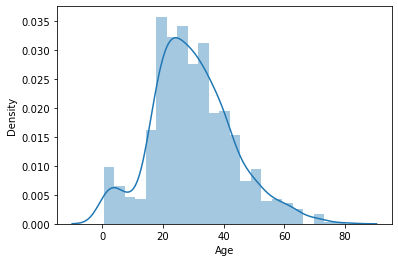

In [31]:
sns.distplot(train['Age'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

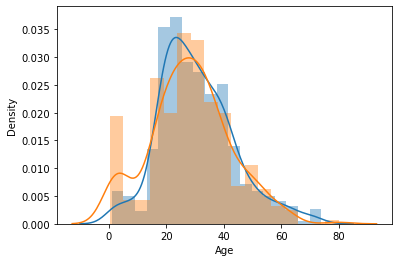

In [32]:
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

In [33]:
train.drop(columns='Ticket',inplace=True)
test.drop(columns='Ticket',inplace=True)

In [34]:
train['Family']=train['SibSp']+train['Parch']+1

In [35]:
test['Family']=test['SibSp']+test['Parch']+1

In [36]:
train['Family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [37]:
train.groupby(['Family'])['Survived'].mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [38]:
def cal(number):
    if number==1:
        return ('Alone')
    elif number>1 and number<5:
        return ('Medium')
    else:
        return 'Large'
        

In [39]:
train['Family_Size']=train['Family'].apply(cal)

In [40]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Family,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,1,Alone


In [41]:
test['Family_Size']=test['Family'].apply(cal)

In [42]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Family,Family_Size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,Q,1,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,S,2,Medium
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,Q,1,Alone


In [43]:
train.drop(columns=['Parch','Family','SibSp'],inplace=True)
test.drop(columns=['Parch','Family','SibSp'],inplace=True)

In [44]:
PassengerId=test['PassengerId'].values

In [45]:
train.drop(columns=['Name','PassengerId'],inplace=True)
test.drop(columns=['Name','PassengerId'],inplace=True)

In [46]:
train.shape

(891, 6)

In [47]:
test.shape

(418, 5)

In [48]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Embarked       0
Family_Size    0
dtype: int64

In [49]:
train

,Survived,Pclass,Sex,Age,Embarked,Family_Size
0,0,3,male,22.0,S,Medium
1,1,1,female,38.0,C,Medium
2,1,3,female,26.0,S,Alone
3,1,1,female,35.0,S,Medium
4,0,3,male,35.0,S,Alone
...,...,...,...,...,...,...
886,0,2,male,27.0,S,Alone
887,1,1,female,19.0,S,Alone
888,0,3,female,22.0,S,Medium
889,1,1,male,26.0,C,Alone


In [50]:
test

,Pclass,Sex,Age,Embarked,Family_Size
0,3,male,34.5,Q,Alone
1,3,female,47.0,S,Medium
2,2,male,62.0,Q,Alone
3,3,male,27.0,S,Alone
4,3,female,22.0,S,Medium
...,...,...,...,...,...
413,3,male,22.0,S,Alone
414,1,female,39.0,C,Alone
415,3,male,38.5,S,Alone
416,3,male,40.0,S,Alone


In [51]:
train

,Survived,Pclass,Sex,Age,Embarked,Family_Size
0,0,3,male,22.0,S,Medium
1,1,1,female,38.0,C,Medium
2,1,3,female,26.0,S,Alone
3,1,1,female,35.0,S,Medium
4,0,3,male,35.0,S,Alone
...,...,...,...,...,...,...
886,0,2,male,27.0,S,Alone
887,1,1,female,19.0,S,Alone
888,0,3,female,22.0,S,Medium
889,1,1,male,26.0,C,Alone


In [52]:
y=train['Survived'].values

In [53]:
train.drop(columns=['Survived'],inplace=True)

In [54]:
final=train.append(test)

In [55]:
final.shape

(1309, 5)

In [56]:
final=pd.get_dummies(final, columns=['Pclass','Sex','Embarked','Family_Size'], drop_first=True)

In [57]:
Xf=final.tail(418).values

In [58]:
X=final.head(891).values

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=i)

In [97]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [84]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [85]:
from catboost import CatBoostClassifier
model3 = CatBoostClassifier(verbose=0)


In [86]:
model3.fit(X_train,y_train)

In [87]:
ypred3=model3.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred3)

0.8044692737430168

In [89]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [90]:
ypred=model.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)

0.770949720670391

In [92]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [93]:
y_pred=classifier.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7653631284916201

In [72]:
yf=classifier.predict(Xf)

In [73]:
Submission=pd.DataFrame()

In [74]:
Submission['PassengerId']=PassengerId
Submission['Survived']=yf

In [75]:
Submission.to_csv('submission.csv', index=False)